##Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
df = pd.read_csv('personality_dataset.csv')

In [8]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
# Encode categorical columns

In [10]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

In [ ]:
# Encode target variable

In [11]:
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [ ]:
# Handle missing data

In [12]:
df = df.dropna()

In [ ]:
# Feature scaling

In [13]:
features = df.drop('Personality', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
y = df['Personality']

In [14]:
# Plot distribution of classes

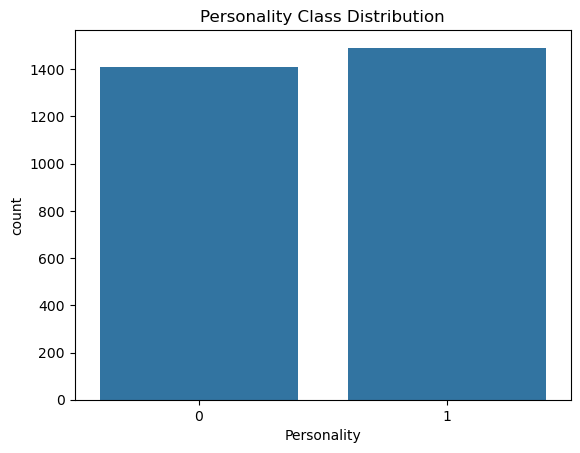

In [15]:
sns.countplot(x='Personality', data=df)
plt.title('Personality Class Distribution')
plt.show()

In [16]:
# Correlation heatmap

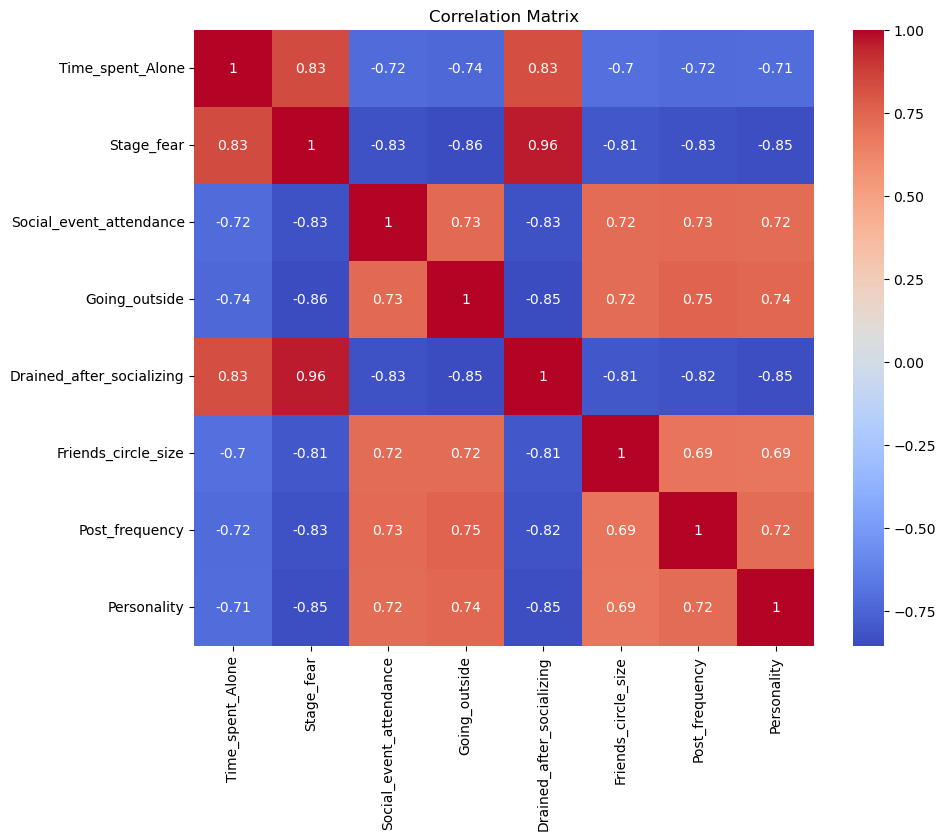

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
## Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Train model

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict

In [24]:
y_pred = clf.predict(X_test)

In [25]:

# Evaluation

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.906896551724138

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       282
           1       0.91      0.90      0.91       298

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



In [27]:
# Confusion matrix plot

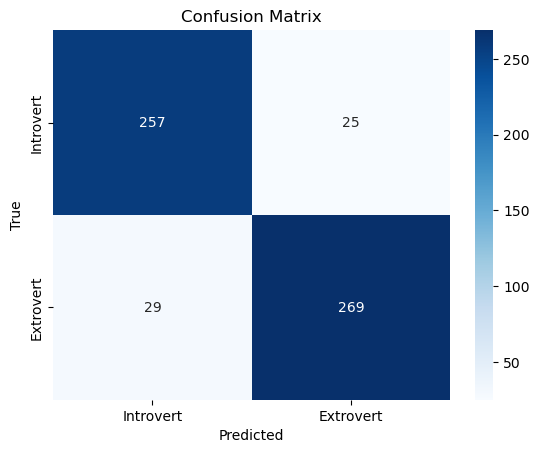

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [29]:
feature_importances = clf.feature_importances_
feat_names = features.columns

imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': feature_importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)
print(imp_df)

                     Feature  Importance
1                 Stage_fear    0.238145
0           Time_spent_Alone    0.187170
2    Social_event_attendance    0.175286
4  Drained_after_socializing    0.154786
6             Post_frequency    0.117841
3              Going_outside    0.068242
5        Friends_circle_size    0.058530


In [30]:
# Plot

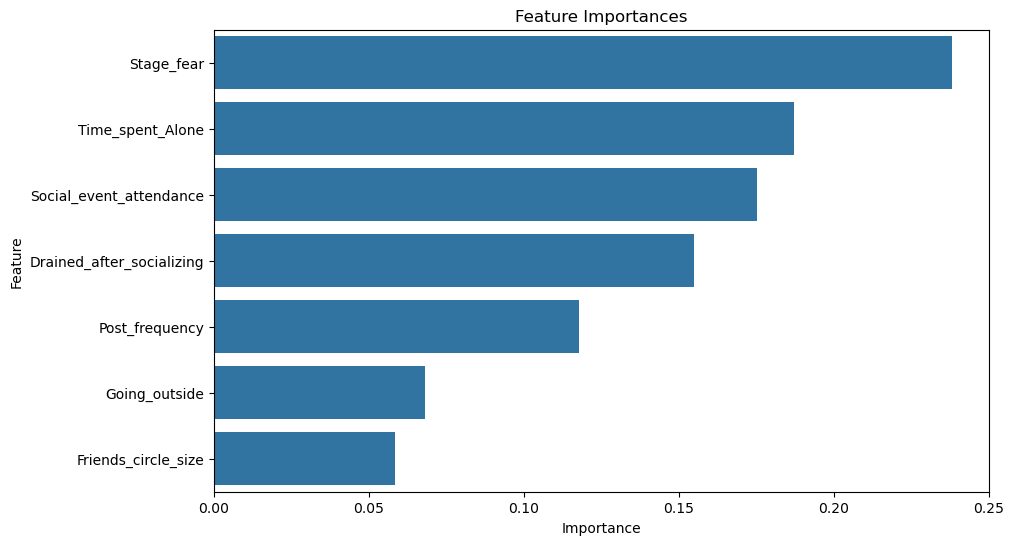

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Feature Importances')
plt.show()

In [32]:
# Example new person

In [33]:
new_data = [[5.0, 1, 4.0, 6.0, 1, 4.0, 2.0]]  # modify as needed
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print("Predicted Personality:", 'Extrovert' if prediction[0] == 1 else 'Introvert')

Predicted Personality: Introvert


C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
